In [13]:
import pandas as pd
from simulate_costs import *
import random
import matplotlib.pyplot as plt
import numpy as np

In [14]:
saturday_demands = pd \
    .read_csv("output/test_saturday_demands.csv") \
    .set_index("Supermarket")
saturday_demands.head()

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,...,Run 991,Run 992,Run 993,Run 994,Run 995,Run 996,Run 997,Run 998,Run 999,Run 1000
Supermarket,,,,,,,,,,,,,,,,,,,,,
Four Square Alberton,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
Four Square Botany Junction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Four Square Cockle Bay,1,1,1,1,1,2,1,2,1,1,...,2,0,1,1,1,1,2,1,0,1
Four Square Ellerslie,1,2,1,1,1,1,1,1,1,1,...,2,1,2,1,0,0,0,1,1,1
Four Square Everglade,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
weekday_demands = pd \
    .read_csv("output/test_weekday_demands.csv") \
    .set_index("Supermarket")
weekday_demands.head()

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,...,Run 991,Run 992,Run 993,Run 994,Run 995,Run 996,Run 997,Run 998,Run 999,Run 1000
Supermarket,,,,,,,,,,,,,,,,,,,,,
Four Square Alberton,1,1,3,2,1,3,5,1,3,2,...,0,0,0,4,1,3,0,1,2,5
Four Square Botany Junction,2,2,0,2,1,2,1,2,1,2,...,3,3,2,2,2,1,2,5,3,4
Four Square Cockle Bay,2,3,4,2,1,3,2,1,0,5,...,2,3,1,2,4,3,2,4,0,1
Four Square Ellerslie,1,1,2,3,3,3,0,2,2,2,...,2,1,2,2,2,3,2,3,4,2
Four Square Everglade,1,0,0,2,3,4,2,0,0,3,...,2,1,0,3,4,3,2,2,1,2


In [16]:
durations = pd \
    .read_csv("../route-generation/output/TravelCosts.csv") \
    .set_index(["From", "To"])
durations.head()

Distance   Duration
From             To                                       
New World Albany New World Albany       0.00000   0.000000
                 New World Birkenhead  15.70707  23.833833
                 New World Botany      35.83163  49.946667
                 New World Browns Bay   5.00226  10.337833
                 New World Devonport   17.81659  29.654833

In [17]:
selected_saturday = pd \
    .read_csv("../linear-program/output/selectedRoutesSaturday.csv") \
    .drop(columns=["RouteNum"])
selected_saturday.head()

,Route,TruckType,RouteCost
0,"['Warehouse', 'New World Papakura', ""Pak 'n Sa...",OwnedTruck,294.5460
1,"['Warehouse', 'New World Mt Roskill', 'New Wor...",OwnedTruck,192.6705
2,"['Warehouse', ""Pak 'n Save Wairau Road"", 'New ...",OwnedTruck,332.3620
3,"['Warehouse', 'New World Birkenhead', 'Four Sq...",OwnedTruck,432.4040
4,"['Warehouse', 'Four Square Alberton', 'New Wor...",OwnedTruck,260.3805


In [18]:
selected_weekday = pd \
    .read_csv("../linear-program/output/selectedRoutesWeekday.csv") \
    .drop(columns=["RouteNum"])
selected_weekday.head()

,Route,TruckType,RouteCost
0,"['Warehouse', 'Four Square Glen Eden', ""Pak 'n...",OwnedTruck,317.127667
1,"['Warehouse', ""Pak 'n Save Lincoln Road"", 'War...",OwnedTruck,104.192500
2,"['Warehouse', ""Pak 'n Save Westgate"", 'Warehou...",OwnedTruck,118.685417
3,"['Warehouse', 'Four Square Everglade', 'New Wo...",OwnedTruck,271.918833
4,"['Warehouse', 'Four Square Botany Junction', '...",OwnedTruck,380.003333


In [19]:
saturday_costs, saturday_mainfreight = simulate_runs(selected_saturday, saturday_demands, durations, "Saturday")
print(np.mean(saturday_costs), sum(saturday_mainfreight))

2896.6360779999995 0


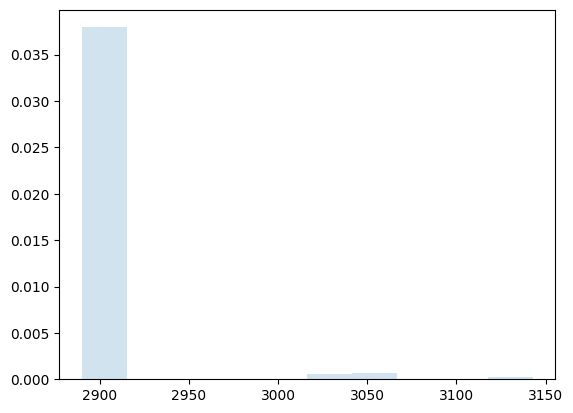

In [20]:
plt.hist(saturday_costs, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

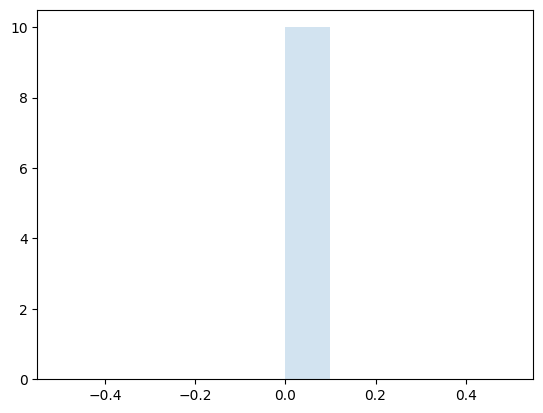

In [21]:
plt.hist(saturday_mainfreight, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

In [22]:
weekday_costs, weekday_mainfreight = simulate_runs(selected_weekday, weekday_demands, durations, "Weekdays")
print(np.mean(weekday_costs), sum(weekday_mainfreight))

5778.641466416667 263


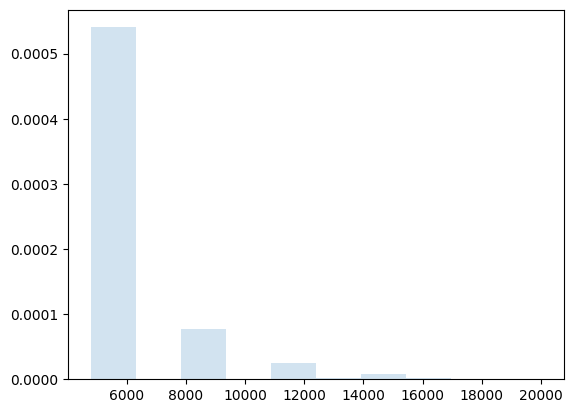

In [23]:
plt.hist(weekday_costs, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

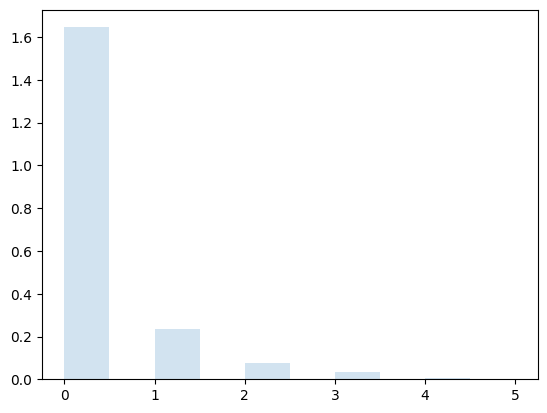

In [24]:
plt.hist(weekday_mainfreight, density=True, histtype='stepfilled', alpha=0.2)
plt.show()